In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the data
file_path_new = 'Data_for_UCI_named.csv'
data_new = pd.read_csv(file_path_new)

#preliminary investigation
print(data_new.head())
print(data_new.info())
print(data_new.shape)



       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns

In [4]:
#Encodeing the target variable "stabf"
data_new['stabf_encoded'] = LabelEncoder().fit_transform(data_new['stabf'])

#Define features and target
X = data_new.drop(columns=['stab', 'stabf', 'stabf_encoded'])  # Features
y = data_new['stabf_encoded']  # Target

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train and evaluate Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_preds = log_reg.predict(X_test_scaled)
log_reg_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

#Evaluate Logistic Regression performance
log_reg_report = classification_report(y_test, log_reg_preds, output_dict=True)
log_reg_auc = roc_auc_score(y_test, log_reg_proba)

#Train and evaluate Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

#Evaluate Random Forest performance
rf_report = classification_report(y_test, rf_preds, output_dict=True)
rf_auc = roc_auc_score(y_test, rf_proba)



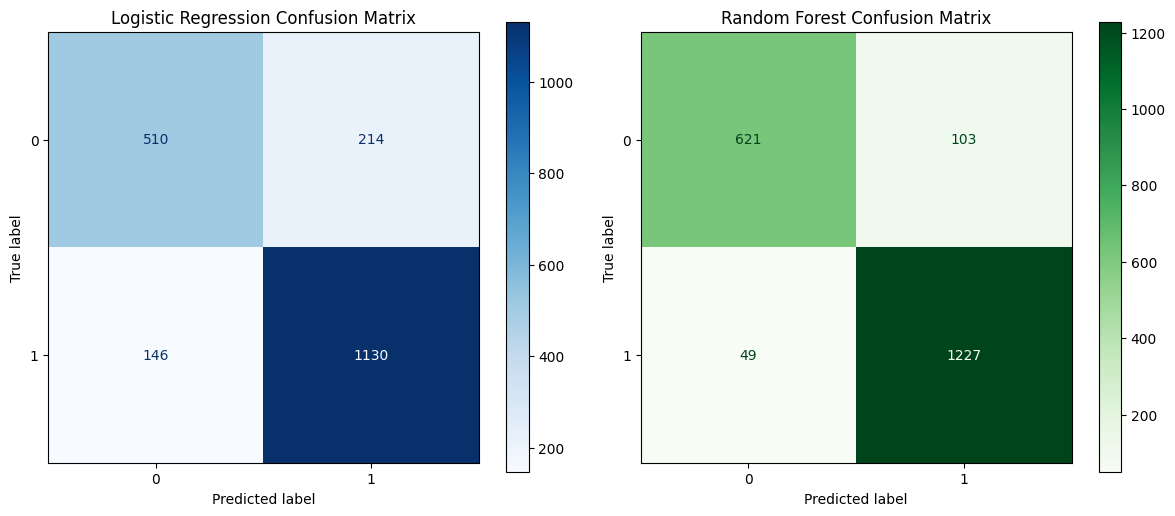

In [5]:
#Visualize confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, ax=ax[0], cmap='Blues')
ax[0].title.set_text('Logistic Regression Confusion Matrix')

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[1], cmap='Greens')
ax[1].title.set_text('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()



In [9]:
#Display feature importance for Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Formatting Results in Rows for Logistic Regression
log_reg_results = {
    "Metric": ['Accuracy', 'ROC AUC', 'Class 0 Precision', 'Class 0 Recall', 'Class 0 F1-Score',
               'Class 1 Precision', 'Class 1 Recall', 'Class 1 F1-Score', 'Macro Avg Precision', 
               'Macro Avg Recall', 'Macro Avg F1-Score', 'Weighted Avg Precision', 'Weighted Avg Recall', 
               'Weighted Avg F1-Score'],
    "Value": [accuracy_score(y_test, log_reg_preds),
              log_reg_auc,
              log_reg_report['0']['precision'],
              log_reg_report['0']['recall'],
              log_reg_report['0']['f1-score'],
              log_reg_report['1']['precision'],
              log_reg_report['1']['recall'],
              log_reg_report['1']['f1-score'],
              log_reg_report['macro avg']['precision'],
              log_reg_report['macro avg']['recall'],
              log_reg_report['macro avg']['f1-score'],
              log_reg_report['weighted avg']['precision'],
              log_reg_report['weighted avg']['recall'],
              log_reg_report['weighted avg']['f1-score']]
}

log_reg_df = pd.DataFrame(log_reg_results)

# Formatting Results in Rows for Random Forest
rf_results = {
    "Metric": ['Accuracy', 'ROC AUC', 'Class 0 Precision', 'Class 0 Recall', 'Class 0 F1-Score',
               'Class 1 Precision', 'Class 1 Recall', 'Class 1 F1-Score', 'Macro Avg Precision', 
               'Macro Avg Recall', 'Macro Avg F1-Score', 'Weighted Avg Precision', 'Weighted Avg Recall', 
               'Weighted Avg F1-Score'],
    "Value": [accuracy_score(y_test, rf_preds),
              rf_auc,
              rf_report['0']['precision'],
              rf_report['0']['recall'],
              rf_report['0']['f1-score'],
              rf_report['1']['precision'],
              rf_report['1']['recall'],
              rf_report['1']['f1-score'],
              rf_report['macro avg']['precision'],
              rf_report['macro avg']['recall'],
              rf_report['macro avg']['f1-score'],
              rf_report['weighted avg']['precision'],
              rf_report['weighted avg']['recall'],
              rf_report['weighted avg']['f1-score']]
}

rf_df = pd.DataFrame(rf_results)

# Displaying the results
print("Logistic Regression Results:")
print(log_reg_df)

print("\nRandom Forest Results:")
print(rf_df)

print("\nRandom Forest Feature Importance:")
print(rf_feature_importance)


Logistic Regression Results:
                    Metric     Value
0                 Accuracy  0.820000
1                  ROC AUC  0.892045
2        Class 0 Precision  0.777439
3           Class 0 Recall  0.704420
4         Class 0 F1-Score  0.739130
5        Class 1 Precision  0.840774
6           Class 1 Recall  0.885580
7         Class 1 F1-Score  0.862595
8      Macro Avg Precision  0.809106
9         Macro Avg Recall  0.795000
10      Macro Avg F1-Score  0.800863
11  Weighted Avg Precision  0.817847
12     Weighted Avg Recall  0.820000
13   Weighted Avg F1-Score  0.817901

Random Forest Results:
                    Metric     Value
0                 Accuracy  0.924000
1                  ROC AUC  0.980613
2        Class 0 Precision  0.926866
3           Class 0 Recall  0.857735
4         Class 0 F1-Score  0.890961
5        Class 1 Precision  0.922556
6           Class 1 Recall  0.961599
7         Class 1 F1-Score  0.941673
8      Macro Avg Precision  0.924711
9         Macro Avg Re